# ML Assignment #1 | Group 41 Submission:

### <u>Problem statement</u>: 
##### We'll use the Bank Authentication Data Set from the UCI repository.Where class indicates whether or not a Bank Note was authentic.

- Import the data from Bank Authentication Data Set (Links to an external site.) after converting text file into CSV and also name the column as per the sequence of the attribute information (1 point)
- Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)
- Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
- Create a Countplot of the Classes (1 point)
- Do Feature Scaling on Independent variables (2 points)
- Split the data into train and test dataset (1 point)
- Use sklearn library to train on train dataset on random forest and predict on test dataset  (3 points)
- Compute the accuracy and confusion matrix. (2 points)

### Group Members (in Roll # order):
- 2019AD04026 - <b>Ankit Gupta</b>
- 2019AD04027 - <b>Hitesh Gupta</b>
- 2019AD04031 - <b>Aditya Mehta</b>

In [200]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix,confusion_matrix, classification_report

### Importing the data from Bank Authentication Data Set post coverting it to CSV format

In [201]:
# Data Import
df = pd.read_csv("data_banknote_authentication.csv")

### Attribute Information:

> 1. variance of Wavelet Transformed image (continuous)
> 2. skewness of Wavelet Transformed image (continuous)
> 3. curtosis of Wavelet Transformed image (continuous)
> 4. entropy of image (continuous)
> 5. class (integer)

In [202]:
# Looking at the data head 
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [203]:
df.shape

(1372, 5)

In [204]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

### Capturing basic statistical details like percentile, mean, standard deviation of dataset

In [205]:
# Basic statistical details like percentile, mean, standard deviation of dataset
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Check missing value counts in columns

In [206]:
# Check missing value counts in columns
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### Count Plot of the classes

Text(0, 0.5, 'Counts')

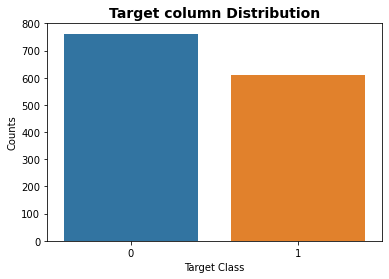

In [207]:
# CountPlot of the classes using Seaborn library

sns.countplot(data=df,x="class")
plt.title('Target column Distribution',size = 14, weight = 'bold')
plt.xlabel('Target Class')
plt.ylabel('Counts')

# Checking relationships between different feature columns

In [208]:
# Checking relationships between different feature columns

# sns.pairplot(df,hue='Target');

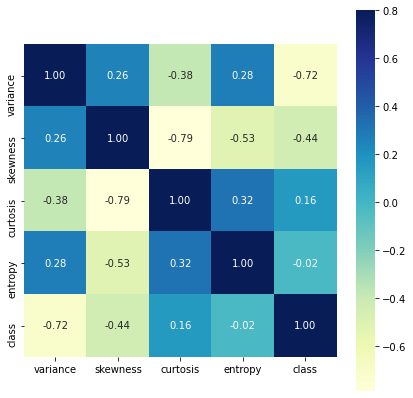

In [209]:
# Looking at the heatmap to see the correlation of different (Independent) variables with the Target (Dependent) Variable
corr_matrix = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix,
           vmax=.8,
           square=True,
           annot=True,
           fmt='.2f',
           cmap='YlGnBu')

### <u>Remove columns which don’t help the problem statement<u>: 
> #### From above, It is clear that Variable Entropy is least Correlated with Target class variable. Thus, can be dropped.

### Dropping Entropy feature as its showing no significance with the Target Class

In [210]:
df = df.drop('entropy', axis=1)

#  Feature Scaling on Independent variables

In [211]:
# Feature Scaling on Independent variables
scaler = StandardScaler()
X = df.drop('class', axis=1)
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(data = X_scaled, columns = df.columns[:-1])
df_scaled.head()

,variance,skewness,curtosis
0,1.121806,1.149455,-0.975970
1,1.447066,1.064453,-0.895036
2,1.207810,-0.777352,0.122218
3,1.063742,1.295478,-1.255397
4,-0.036772,-1.087038,0.736730


# Spliting data into train and test dataset

In [212]:
# Split the data into train and test dataset

X = df_scaled.values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
y_test  = (y_test==1).astype(np.int32)
y_train = (y_train==1).astype(np.int32)

In [213]:
print ('----------------------------')
print ('Complete Data Shape :', df.shape)
print ('----------------------------')
print ('Train Data Shape :', X_train.shape)
print ('Test Data shape  :', X_test.shape)
print ('----------------------------')

----------------------------
Complete Data Shape : (1372, 4)
----------------------------
Train Data Shape : (1097, 3)
Test Data shape  : (275, 3)
----------------------------


### Modeling: Random Forest Classifier

> Finalized these HyperParameters after running iterations to make the model more generic
> - n_estimators=21, max_depth=6

In [214]:
# Applying Random Forest 
model_rf = RandomForestClassifier(n_estimators=21, max_depth=6, random_state=45)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

### Model Evaluation:
> - Predict on test set and match with result
> - Check Accuarcy/Precision/Recall
> - Visualizing model structure


In [215]:
y_predict = model_rf.predict(X_test)

Accuracy of classifier is : 0.9963636363636363
              precision    recall  f1-score   support

     class_0       1.00      0.99      1.00       157
     class_1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



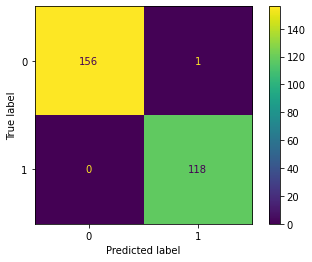

In [216]:
# validate accuracy
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict))
print (classification_report(y_true=y_test, y_pred=y_predict, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model_rf, X=X_test, y_true=y_test, values_format='.0f')